In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from sklearn.datasets import load_boston
import seaborn as sns
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pickle

In [2]:
boston = load_boston()

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
bos = pd.DataFrame(boston.data,columns = boston.feature_names)

In [5]:
boston.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [6]:
bos

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [7]:
bos['MEDV'] = boston.target

In [8]:
bos

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [9]:
bos.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [10]:
report = ProfileReport(bos)
report.to_widgets()

Summarize dataset:   0%|          | 0/27 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

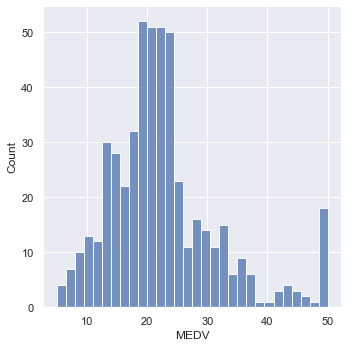

In [11]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.displot(bos['MEDV'],bins=30)
plt.show()

In [12]:
corr_matrix = bos.corr().round(2)

<AxesSubplot:>

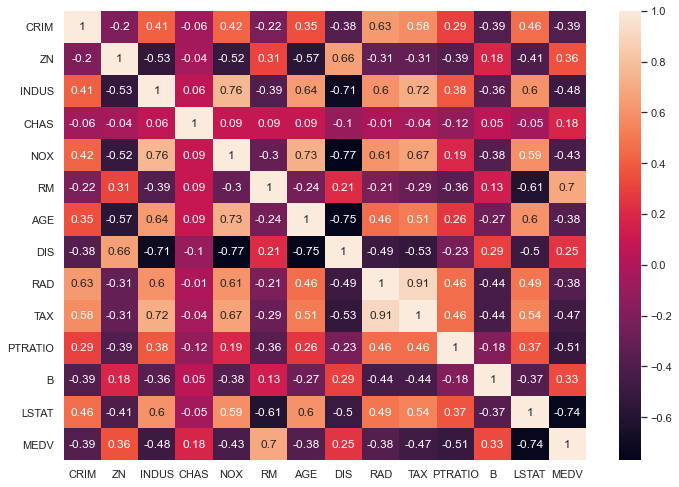

In [13]:
sns.heatmap(corr_matrix,annot = True)

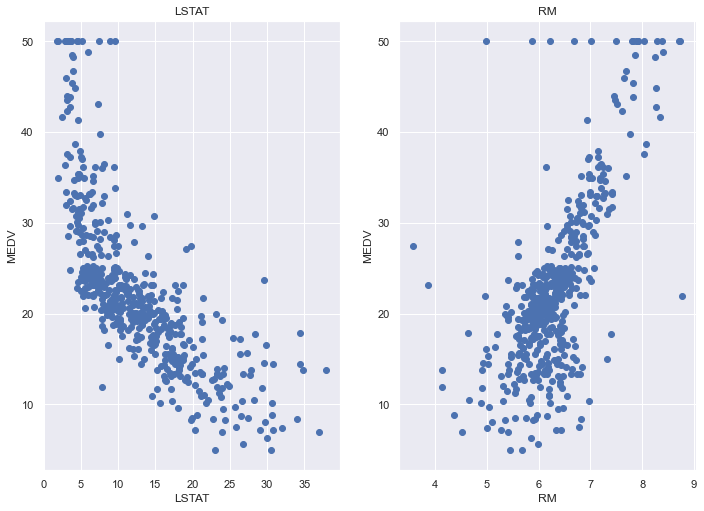

In [106]:
features = ['LSTAT','RM']
target = bos['MEDV']
for i , col in enumerate(features):
    plt.subplot(1,2,i+1)
    plt.scatter(x = bos[col],y = target)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')


    


In [97]:
X = pd.DataFrame(np.c_[bos['LSTAT'], bos['RM']],columns = ['LSTAT','RM'])

In [98]:
Y = bos['MEDV']

In [99]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 5)

In [100]:
lr = LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [101]:
y_train_pred = lr.predict(X_train)

In [102]:
error = np.sqrt(mean_squared_error(Y_train,y_train_pred))

In [103]:
score = lr.score(X_train,Y_train)

In [104]:
score #r2

0.6300745149331701

In [105]:
def adj_r2(x,y):
    r2 = lr.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adj_r2

In [106]:
y_test = np.array(Y_test).reshape(-1,1)

In [107]:
adj_r2(X_test,y_test)

0.6560895903978607

In [108]:
y_test_pred = lr.predict(X_test)

In [109]:
rmse = np.sqrt(mean_squared_error(Y_test,y_test_pred))

In [110]:
rmse

5.137400784702911

In [111]:
test_score = lr.score(X_test,Y_test)

In [112]:
adj_r2(X_test,Y_test)

0.6560895903978607

In [113]:
pickle.dump(lr,open('assign2.sav','wb'))

In [2]:
model = pickle.load(open('assign2.sav','rb'))

In [116]:
model.predict([[4.98,6.575]])

array([29.33966548])

In [3]:
from flask import Flask,request,jsonify

In [4]:
app = Flask(__name__)

In [ ]:
@app.route('/predict',methods = ['GET','POST'])
def pred():
    RM = float(request.json['RM'])
    LSTAT = float(request.json['LSTAT'])
    price = model.predict([[RM,LSTAT]])
    return jsonify('Predicted price {}:'.format(price[0]))


if __name__ == '__main__':
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [08/Sep/2021 00:08:21] "POST //predict HTTP/1.1" 200 -
